In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import Image
from subprocess import call

In [2]:
iris = pd.read_csv("scikit_learn_iris_dataset.csv")

iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
108,6.7,2.5,5.8,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
28,5.2,3.4,1.4,0.2,setosa
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica


In [3]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [5]:
iris['species'] = iris['species'].astype('category')
print(iris.dtypes)
iris.species

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [7]:
X = iris.drop('species', axis=1)
y = iris[['species']]

print(X.sample(5))
print(y.sample(5))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
84                 5.4               3.0                4.5               1.5
57                 4.9               2.4                3.3               1.0
146                6.3               2.5                5.0               1.9
17                 5.1               3.5                1.4               0.3
32                 5.2               4.1                1.5               0.1
        species
38       setosa
77   versicolor
81   versicolor
117   virginica
103   virginica


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 1) (38, 1)


In [11]:
y_train, y_test = np.ravel(y_train), np.ravel(y_test)
print(y_train.shape, y_test.shape)

(112,) (38,)


In [12]:
rftree = RandomForestClassifier(n_estimators=100, random_state=1)
rftree.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [13]:
y_prediction = rftree.predict(X_test)
print(y_prediction)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa']


In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))

Accuracy: 0.9736842105263158


In [16]:
comparison = pd.DataFrame({"Actual":y_test, "Predicted":y_prediction})

In [17]:
display(comparison.loc[~(comparison['Actual']==comparison['Predicted'])])
display(comparison)

,Actual,Predicted
22,versicolor,virginica


,Actual,Predicted
0,setosa,setosa
1,versicolor,versicolor
2,versicolor,versicolor
3,setosa,setosa
4,virginica,virginica
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,setosa,setosa
9,virginica,virginica


In [18]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [19]:
confusion_matrix(y_test, y_prediction)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

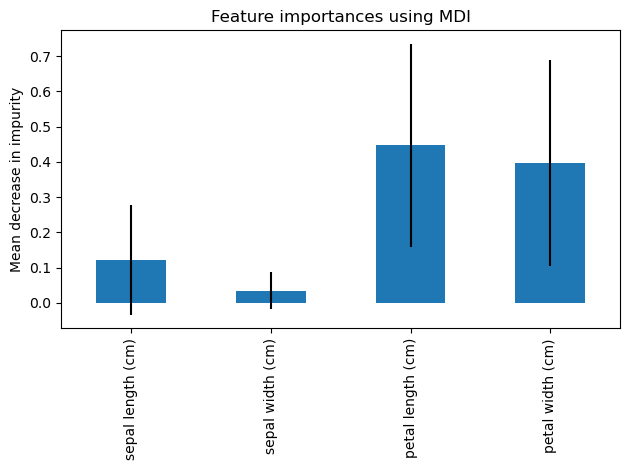

In [21]:
importances = rftree.feature_importances_

std = np.std([tree.feature_importances_ for tree in rftree.estimators_],axis=0)
forest_importances= pd.Series(importances, index = iris.columns.drop("species"))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

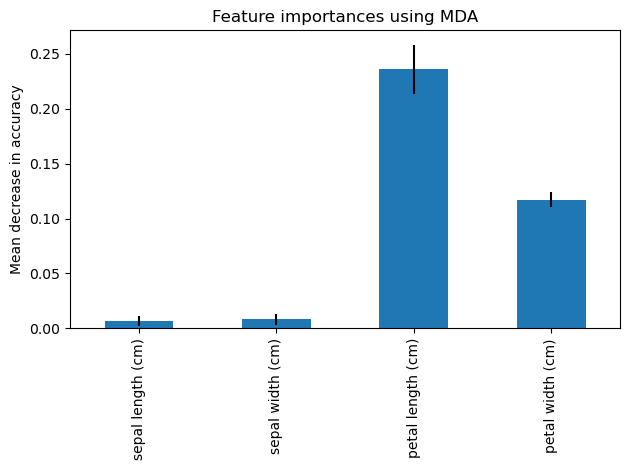

In [22]:
mda = permutation_importance(rftree, X, y, scoring='accuracy', random_state=1)
mda_importance =mda.importances_mean
mda_std=mda.importances_std
mda_forest_importances=pd.Series(mda_importance, index = iris.columns.drop("species"))

fig, ax = plt.subplots()
mda_forest_importances.plot.bar(yerr=mda_std,ax=ax)
ax.set_title("Feature importances using MDA")
ax.set_ylabel("Mean decrease in accuracy")
fig.tight_layout()

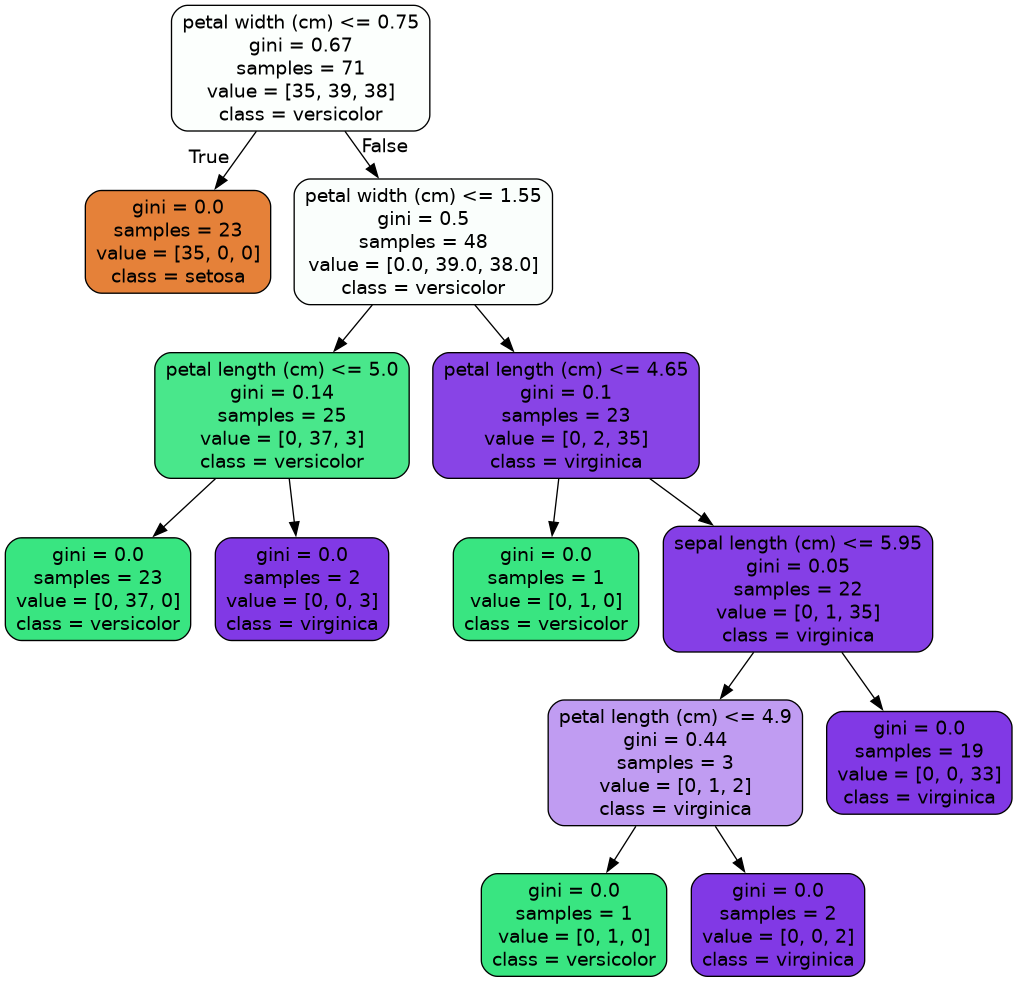

In [24]:
estimator=rftree.estimators_[42]

export_graphviz(estimator, out_file='tree_42.dot',
                feature_names=iris.columns.drop("species"),
                class_names=iris['species'].cat.categories,
                rounded=True,proportion=False,
                       precision=2,filled=True)
call(['dot','-Tpng','tree_42.dot','-o','tree_42.png','-Gdpi-600'])
Image(filename='tree_42.png')

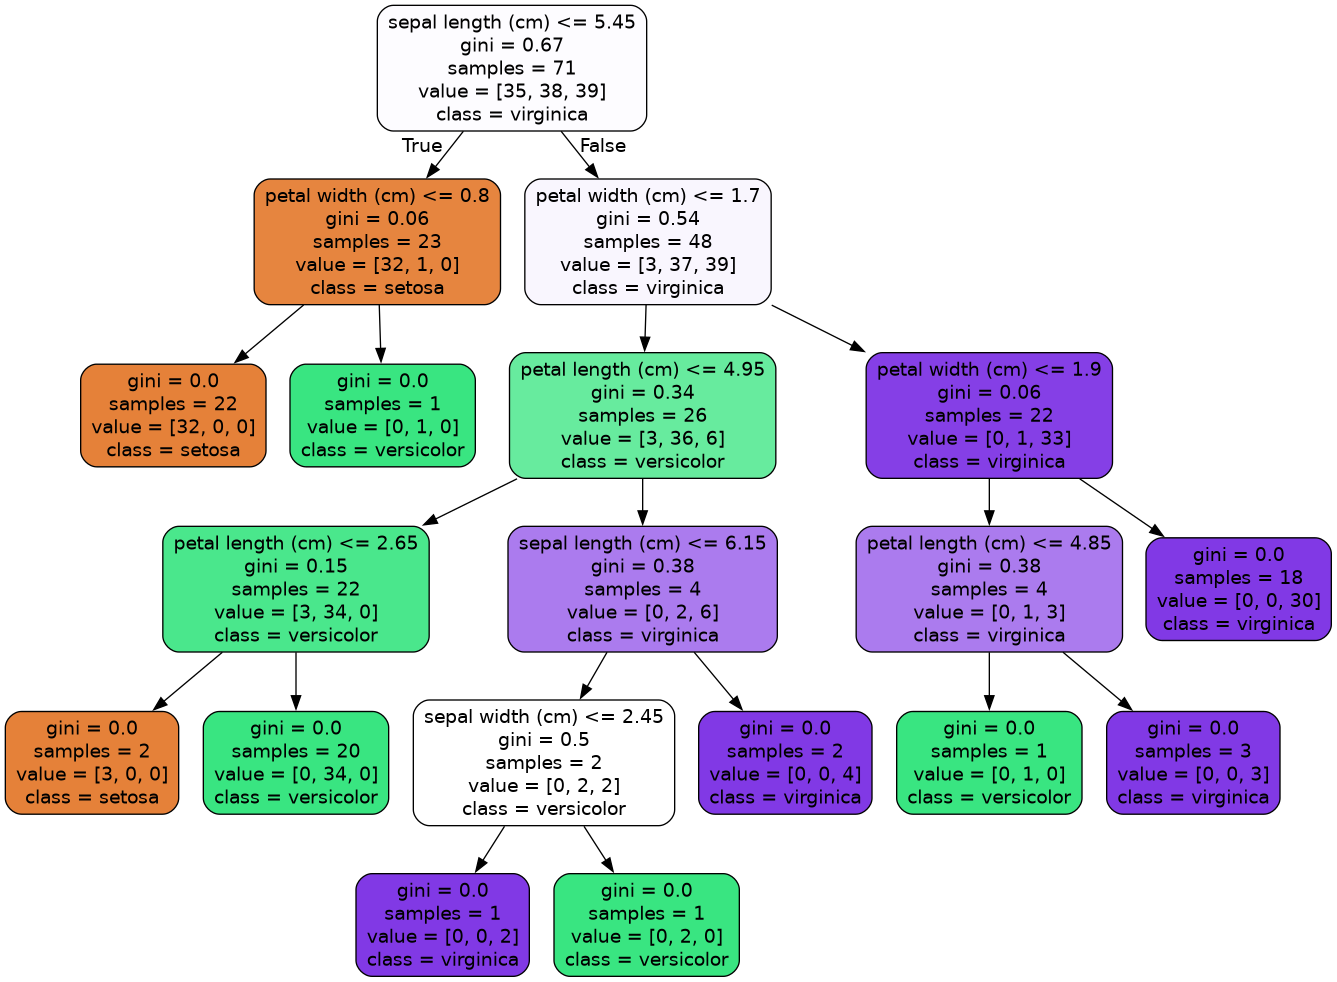

In [25]:
estimator=rftree.estimators_[2]

export_graphviz(estimator, out_file='tree_2.dot',
                feature_names=iris.columns.drop("species"),
                class_names=iris['species'].cat.categories,
                rounded=True,proportion=False,
                       precision=2,filled=True)
call(['dot','-Tpng','tree_2.dot','-o','tree_2.png','-Gdpi-600'])
Image(filename='tree_2.png')